# Experiment records
- Dataset used: Production dataset (Link: https://drive.google.com/file/d/1AC8YkEcZite9Cz2eFJ8Rusk-nUxpjgfW/view)
- Description of experiment: To compare the performance and analyse the misclassifications in between old model (resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5 (Fine-tuned on base model)) and new model (model_161222/ checkpoint_09_0.02.h5)
- Result obtained: - (Complete dataset - including strikeouts) Old model accuracy: 92.2% and New model accuracy: 95.1% 
 - (Partial dataset - removed strikeouts) Old model accuracy: 96.7% and New model accuracy: 97.7%
          

In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
# from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2023-01-02 15:22:32.050849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-02 15:22:32.050875: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Loading old model

In [2]:
model = tf.keras.models.load_model('../../models/pre-trained_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5')

2023-01-02 12:18:29.281133: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-02 12:18:29.281160: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2023-01-02 12:18:29.281412: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_results = None):
    result = {}
    wrong_results = {}
    gt=[]
    prediction = []
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img=cv2.imread(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_results[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_results

In [4]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/0/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

2023-01-02 12:18:34.921781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [5]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [6]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/1/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [7]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [8]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/2/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [9]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [10]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [11]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.88
              precision    recall  f1-score   support

           3       1.00      0.88      0.94        25
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.88        25
   macro avg       0.25      0.22      0.23        25
weighted avg       1.00      0.88      0.94        25



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
len(wrong_results)

3

Text(0.5, 0.98, 'Misclassifications')

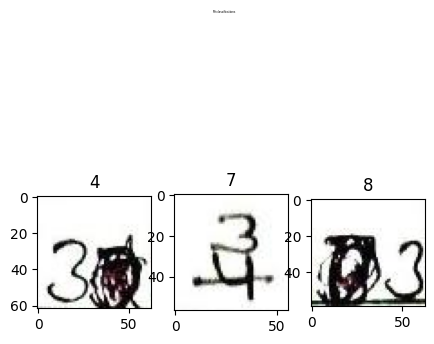

In [13]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=3, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 3

In [14]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [15]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [16]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [17]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9047619047619048
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       1.00      0.90      0.95        21
           8       0.00      0.00      0.00         0

    accuracy                           0.90        21
   macro avg       0.33      0.30      0.32        21
weighted avg       1.00      0.90      0.95        21



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
len(wrong_results)

2

Text(0.5, 0.98, 'Misclassifications')

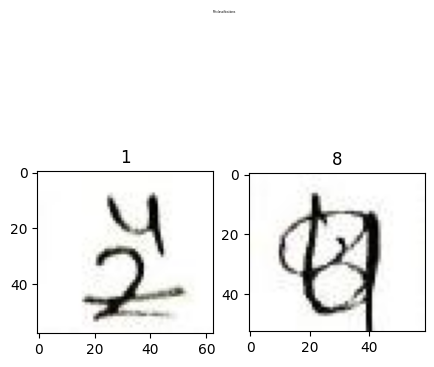

In [19]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 4

In [20]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [21]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [22]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/5/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [23]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           5       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [24]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/6/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [25]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           6       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [26]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [27]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           7       1.00      0.90      0.95        20
           8       0.00      0.00      0.00         0

    accuracy                           0.90        20
   macro avg       0.33      0.30      0.32        20
weighted avg       1.00      0.90      0.95        20



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
len(wrong_results)

2

Text(0.5, 0.98, 'Misclassifications')

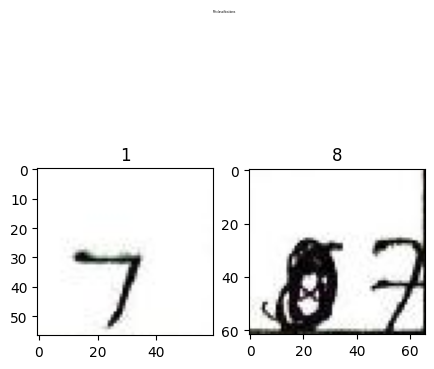

In [29]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 7

In [31]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [32]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9444444444444444
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           7       1.00      0.94      0.97        18

    accuracy                           0.94        18
   macro avg       0.50      0.47      0.49        18
weighted avg       1.00      0.94      0.97        18



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [34]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       1.00      0.71      0.83        14

    accuracy                           0.71        14
   macro avg       0.25      0.18      0.21        14
weighted avg       1.00      0.71      0.83        14



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
len(wrong_results)

4

Text(0.5, 0.98, 'Misclassifications')

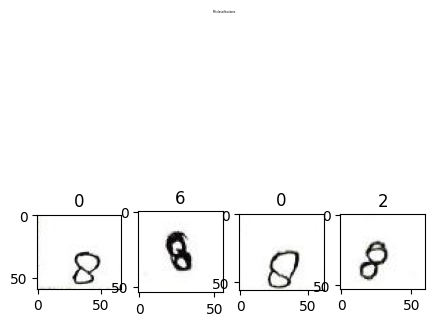

In [36]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=4, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 8

In [37]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [38]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           8       1.00      0.73      0.84        11

    accuracy                           0.73        11
   macro avg       0.33      0.24      0.28        11
weighted avg       1.00      0.73      0.84        11



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [40]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8333333333333334
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
           9       1.00      0.83      0.91        12

    accuracy                           0.83        12
   macro avg       0.50      0.42      0.45        12
weighted avg       1.00      0.83      0.91        12



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
len(wrong_results)

2

Text(0.5, 0.98, 'Misclassifications')

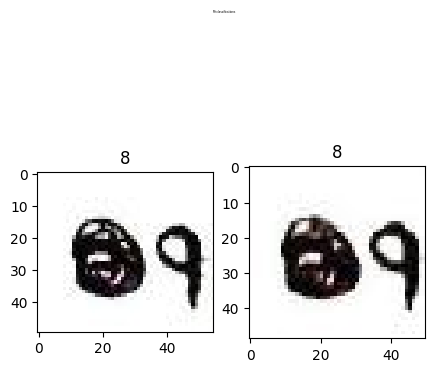

In [42]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 9

In [44]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [45]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           9       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



# Loading new model

In [4]:
model = tf.keras.models.load_model('../../models/saved_model/checkpoint_15_0.01.h5')

2023-01-02 15:24:02.346842: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-02 15:24:02.346871: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2023-01-02 15:24:02.347121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/0/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

2023-01-02 15:24:06.502575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [7]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/1/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [8]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9583333333333334
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           7       0.00      0.00      0.00         0

    accuracy                           0.96        24
   macro avg       0.50      0.48      0.49        24
weighted avg       1.00      0.96      0.98        24



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

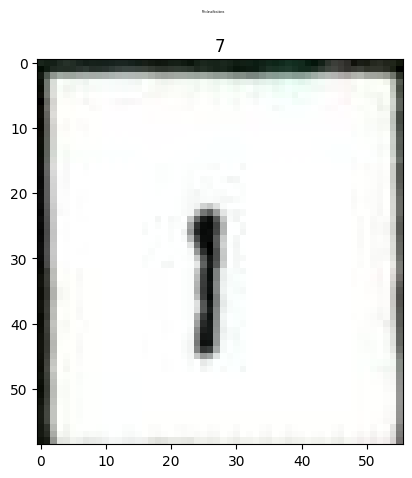

In [10]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [11]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/2/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [12]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [13]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [14]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.96
              precision    recall  f1-score   support

           3       1.00      0.96      0.98        25
           8       0.00      0.00      0.00         0

    accuracy                           0.96        25
   macro avg       0.50      0.48      0.49        25
weighted avg       1.00      0.96      0.98        25



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

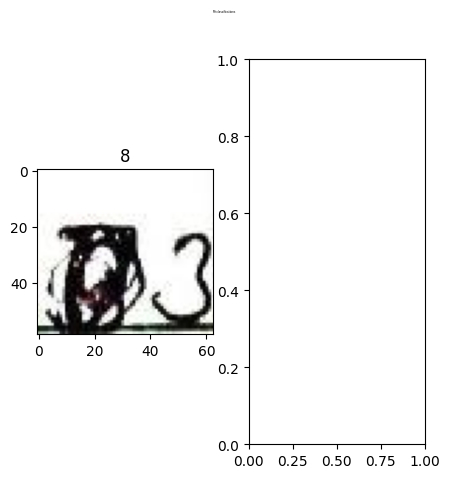

In [16]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 3

In [17]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [18]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [19]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [20]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9523809523809523
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted avg       1.00      0.95      0.98        21



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Removing strikeouts from dataset for digit 4

In [21]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [22]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [23]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/5/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [24]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           5       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [25]:
len(wrong_results)

0

Text(0.5, 0.98, 'Misclassifications')

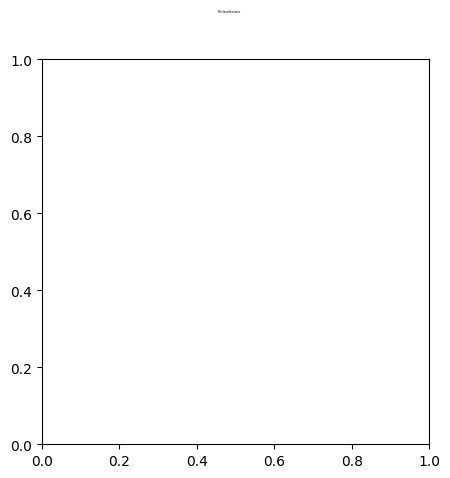

In [26]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=1, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [27]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/6/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [28]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           6       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [29]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [30]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.95
              precision    recall  f1-score   support

           7       1.00      0.95      0.97        20
           8       0.00      0.00      0.00         0

    accuracy                           0.95        20
   macro avg       0.50      0.47      0.49        20
weighted avg       1.00      0.95      0.97        20



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
len(wrong_results)

1

Text(0.5, 0.98, 'Misclassifications')

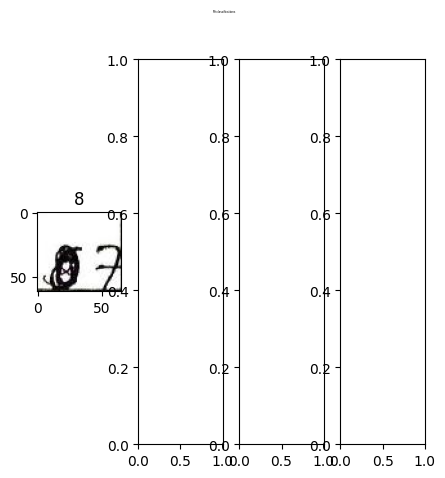

In [32]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=4, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 7

In [33]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [34]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           7       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [35]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [36]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8571428571428571
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           8       1.00      0.86      0.92        14

    accuracy                           0.86        14
   macro avg       0.50      0.43      0.46        14
weighted avg       1.00      0.86      0.92        14



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
len(wrong_results)

2

Text(0.5, 0.98, 'Misclassifications')

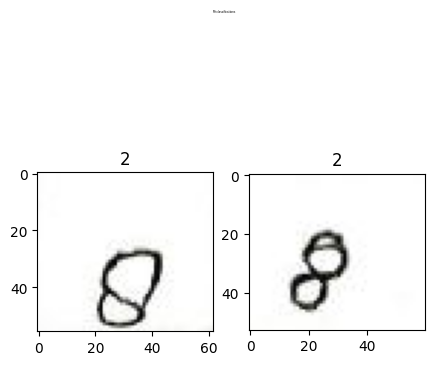

In [38]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 8

In [39]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [40]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8181818181818182
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           8       1.00      0.82      0.90        11

    accuracy                           0.82        11
   macro avg       0.50      0.41      0.45        11
weighted avg       1.00      0.82      0.90        11



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
path = os.path.expanduser('~')+'/handwritten_dataset/new_inference_dataset/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [42]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8333333333333334
              precision    recall  f1-score   support

           8       0.00      0.00      0.00         0
           9       1.00      0.83      0.91        12

    accuracy                           0.83        12
   macro avg       0.50      0.42      0.45        12
weighted avg       1.00      0.83      0.91        12



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
len(wrong_results)

2

Text(0.5, 0.98, 'Misclassifications')

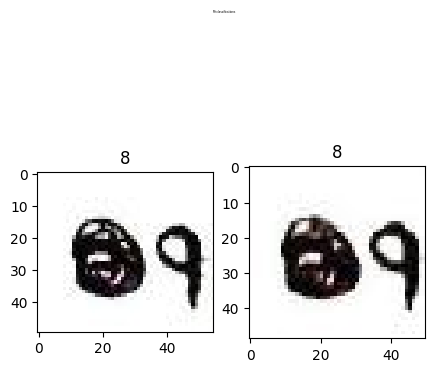

In [44]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=2, figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

## Removing strikeouts from dataset for digit 9

In [45]:
path = os.path.expanduser('~')+'/handwritten_dataset/partly_new_inference_dataset/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [46]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           9       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

